In [1]:
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import RandomOverSampler



In [2]:
def load_tweets(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        tweets = file.readlines()
    return [tweet.strip() for tweet in tweets]

def load_labels(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        labels = file.readlines()
    return [label.strip() for label in labels]

In [3]:
tweets_file_path = 'train_text.txt'
emojis_file_path = 'train_labels.txt'

# Load tweets and labels
X = load_tweets(tweets_file_path)
y = load_labels(emojis_file_path)

# Assuming 'X' contains your preprocessed tweet text and 'y' contains corresponding emojis
X_train, X_test_locked, y_train, y_test_locked = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2,stratify=y_train, random_state=42)

# Apply oversampling to the training set
#oversampler = RandomOverSampler(random_state=42)
#X_train, y_train = oversampler.fit_resample(X_train, y_train)

In [45]:
# Convert text data to numerical features using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=10000, sublinear_tf=True)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test_locked)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [46]:
# Train SVC
svm_model = SVC(kernel='rbf',class_weight='balanced', gamma=1)
svm_model.fit(X_train_tfidf, y_train)

SVC(class_weight='balanced', gamma=1)

In [47]:
# Make predictions on the test set
y_pred = svm_model.predict(X_test_tfidf)

In [48]:
from sklearn.metrics import f1_score
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
f1=f1_score(y_test, y_pred, average='weighted')
print(f1)

Accuracy: 0.24722222222222223
0.24282714809527153


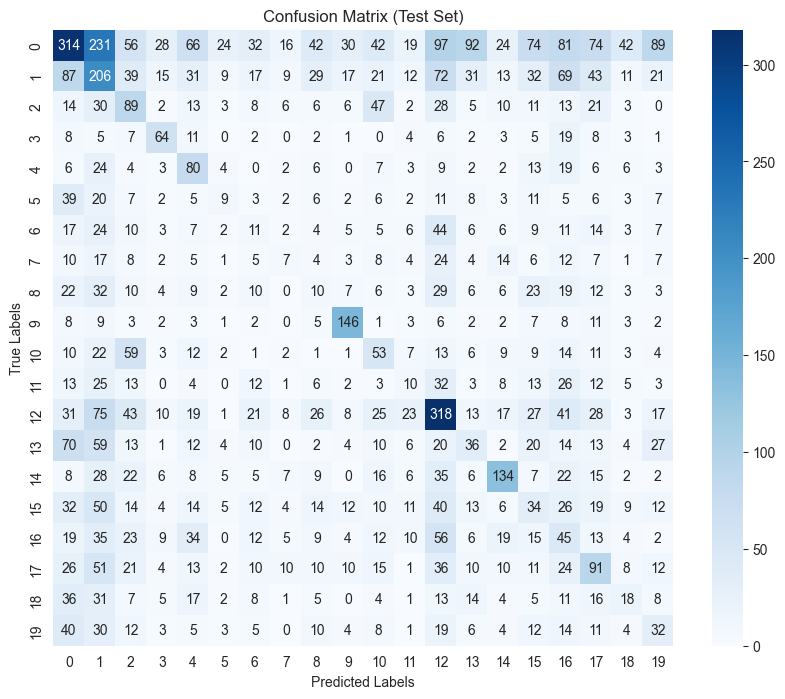

In [40]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Test Set)')
plt.show()

In [41]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.39      0.21      0.28      1473
           1       0.21      0.26      0.23       784
          10       0.19      0.28      0.23       317
          11       0.38      0.42      0.40       151
          12       0.22      0.40      0.28       199
          13       0.11      0.06      0.08       157
          14       0.06      0.06      0.06       196
          15       0.09      0.05      0.06       149
          16       0.05      0.05      0.05       216
          17       0.56      0.65      0.60       224
          18       0.18      0.22      0.20       242
          19       0.07      0.05      0.06       191
           2       0.35      0.42      0.38       754
           3       0.13      0.11      0.12       327
           4       0.45      0.39      0.42       343
           5       0.10      0.10      0.10       341
           6       0.09      0.14      0.11       332
    

In [12]:
from sentence_transformers import SentenceTransformer
encoder = SentenceTransformer(
    "sentence-transformers/distiluse-base-multilingual-cased-v2"
)

x_embed = []

for point in X_train:
    x_embed.append(encoder.encode(point))

print(x_embed[:10])

.gitattributes:   0%|          | 0.00/690 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

2_Dense/config.json:   0%|          | 0.00/114 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.58M [00:00<?, ?B/s]

README.md:   0%|          | 0.00/2.69k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/610 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/539M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/531 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

[array([-1.95899722e-03, -2.16128509e-02, -4.15530652e-02, -6.02378808e-02,
       -2.40432583e-02, -6.54324293e-02,  4.65695448e-02,  5.70238335e-03,
       -3.31858248e-02,  3.08625624e-02,  4.07234095e-02, -1.50971161e-02,
       -3.75634767e-02,  4.61502224e-02,  3.79034289e-04,  5.26052527e-02,
       -4.41866554e-02, -4.20969464e-02,  9.90337506e-03, -4.34365729e-03,
        3.53238396e-02, -4.63961856e-03, -2.39300095e-02, -1.22072489e-03,
        1.35528110e-02, -4.41859066e-02,  2.83650458e-02, -4.59751114e-02,
        1.66771596e-03, -1.11448439e-02, -3.31421532e-02,  4.43711784e-03,
        1.98591617e-03, -1.01400418e-02,  2.20663343e-02, -8.15442353e-02,
        8.58121458e-03,  1.98836084e-02, -9.22028814e-03,  3.95140238e-02,
       -5.36076352e-02,  6.42333627e-02,  6.48383051e-02,  8.77340659e-02,
        4.13590902e-03,  3.13741416e-02, -1.65411960e-02,  3.10849715e-02,
       -1.30603239e-02, -1.32333068e-02,  9.15450975e-03,  2.41048858e-02,
       -1.12723438e-02, 

In [17]:
svm_model = SVC(kernel='linear',class_weight='balanced', gamma=1)
svm_model.fit(x_embed, y_train)

SVC(class_weight='balanced', gamma=1, kernel='linear')

In [14]:
xtest_embed = []
for point in X_test:
    xtest_embed.append(encoder.encode(point))

In [18]:
y_pred = svm_model.predict(xtest_embed)

In [19]:
from sklearn.metrics import f1_score
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
f1=f1_score(y_test, y_pred, average='weighted')
print(f1)

Accuracy: 0.275
0.28916529128818574


In [20]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.38      0.51      1473
           1       0.30      0.15      0.20       784
          10       0.22      0.25      0.23       317
          11       0.17      0.54      0.26       151
          12       0.31      0.63      0.41       199
          13       0.11      0.16      0.13       157
          14       0.09      0.17      0.12       196
          15       0.10      0.23      0.14       149
          16       0.06      0.08      0.07       216
          17       0.49      0.75      0.59       224
          18       0.18      0.26      0.21       242
          19       0.06      0.07      0.06       191
           2       0.46      0.30      0.36       754
           3       0.19      0.16      0.17       327
           4       0.37      0.41      0.39       343
           5       0.15      0.10      0.12       341
           6       0.13      0.11      0.12       332
    

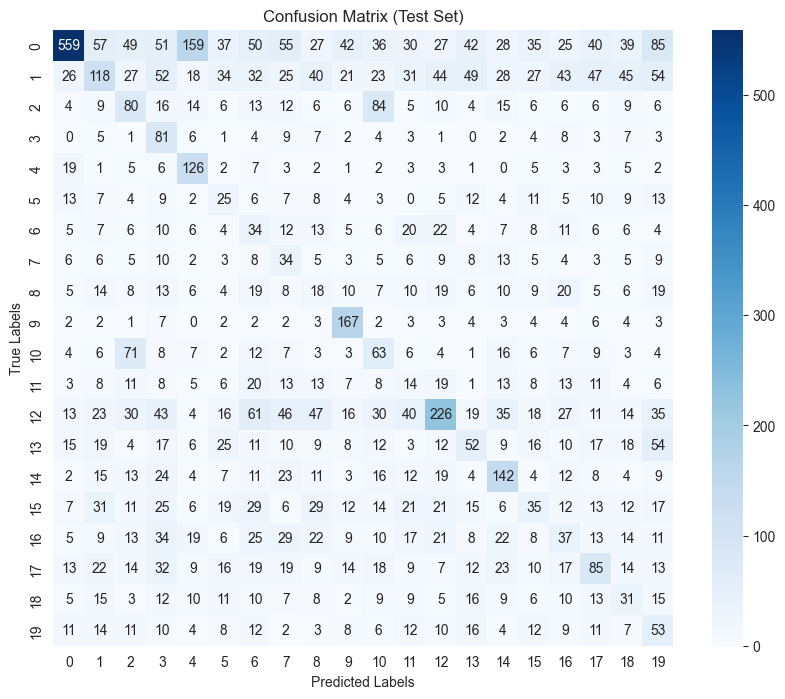

In [21]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Test Set)')
plt.show()

In [49]:
import tensorflow_hub as hub
import numpy as np

module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
model = hub.load(module_url)
x_embed = []

for point in X_train:
    x_embed.append(model([point])[0])



In [50]:
import tensorflow as tf
tf.experimental.numpy.experimental_enable_numpy_behavior()
x_embed

[<tf.Tensor: shape=(512,), dtype=float32, numpy=
 array([-0.00937157, -0.05770319, -0.00506315,  0.03057128, -0.04006887,
         0.07838589,  0.01164817,  0.07410979,  0.08704581, -0.06293377,
        -0.01285269, -0.03241972,  0.05750572, -0.02998304, -0.02756296,
         0.02601253, -0.00141084, -0.05560695,  0.08267495, -0.0775127 ,
         0.10359707,  0.0038012 , -0.02134773,  0.03039557, -0.06324032,
        -0.03334201, -0.03105308, -0.02160262,  0.02401118, -0.01804198,
        -0.01281743, -0.0089698 ,  0.02329596,  0.01694387,  0.01463874,
         0.00560689,  0.02569072, -0.05296288, -0.02174013,  0.03796103,
        -0.03128352, -0.03026176, -0.02232267,  0.01099006,  0.02102354,
         0.01461091, -0.06163709,  0.02129267, -0.0250623 ,  0.04018182,
         0.01286808,  0.09032741,  0.02906969, -0.086763  , -0.00869859,
        -0.07469334, -0.08212781,  0.02689377, -0.05951085,  0.06350725,
        -0.0155424 ,  0.00953308,  0.02958968, -0.08839461, -0.06508522,
  

In [57]:
svm_model = SVC(kernel='rbf',class_weight='balanced', gamma=1)
svm_model.fit(x_embed, y_train)

SVC(class_weight='balanced', gamma=1)

In [58]:
xtest_embed = []
for point in X_test:
    xtest_embed.append(model([point])[0])

In [59]:
y_pred = svm_model.predict(xtest_embed)

In [60]:
from sklearn.metrics import f1_score
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
f1=f1_score(y_test, y_pred, average='weighted')
print(f1)

Accuracy: 0.2751388888888889
0.2790472114170564


In [61]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.33      0.43      1473
           1       0.30      0.22      0.26       784
          10       0.20      0.25      0.22       317
          11       0.28      0.51      0.36       151
          12       0.23      0.54      0.32       199
          13       0.12      0.10      0.10       157
          14       0.09      0.11      0.10       196
          15       0.07      0.09      0.08       149
          16       0.07      0.07      0.07       216
          17       0.52      0.71      0.60       224
          18       0.14      0.21      0.17       242
          19       0.09      0.08      0.09       191
           2       0.45      0.43      0.44       754
           3       0.14      0.14      0.14       327
           4       0.32      0.43      0.37       343
           5       0.13      0.09      0.10       341
           6       0.12      0.12      0.12       332
    

              precision    recall  f1-score   support

           0       0.61      0.33      0.43      1473
           1       0.30      0.22      0.26       784
          10       0.20      0.25      0.22       317
          11       0.28      0.51      0.36       151
          12       0.23      0.54      0.32       199
          13       0.12      0.10      0.10       157
          14       0.09      0.11      0.10       196
          15       0.07      0.09      0.08       149
          16       0.07      0.07      0.07       216
          17       0.52      0.71      0.60       224
          18       0.14      0.21      0.17       242
          19       0.09      0.08      0.09       191
           2       0.45      0.43      0.44       754
           3       0.14      0.14      0.14       327
           4       0.32      0.43      0.37       343
           5       0.13      0.09      0.10       341
           6       0.12      0.12      0.12       332
           7       0.23    

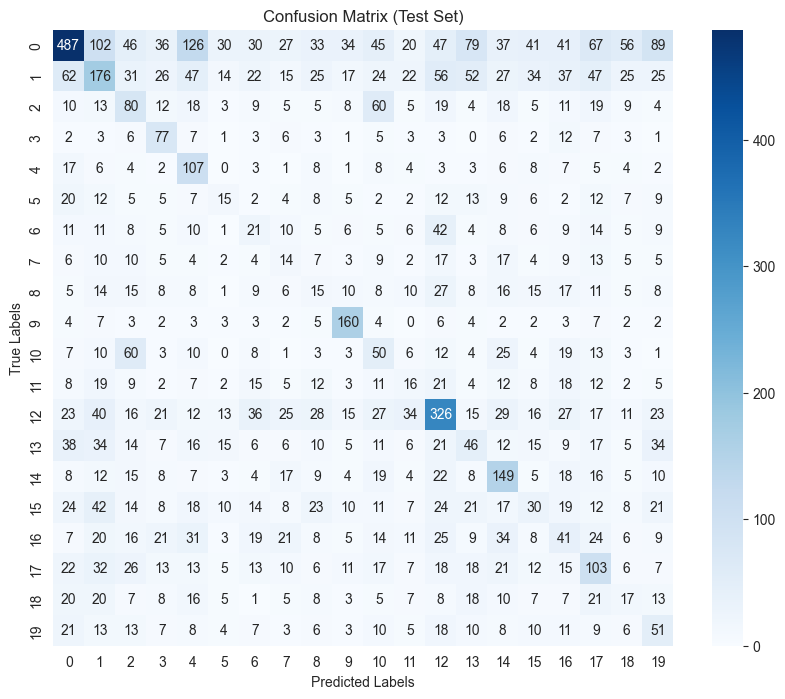

In [62]:
print(report)
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Test Set)')
plt.show()